Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

Importing Zomato Restaurants Dataset

In [3]:
path = r'C:\Users\honoc\Documents\CareerFoundry Folder\Advanced Analytics and Dashboard Design\Zomato Folder'
path
df = pd.read_csv(os.path.join(path, 'Original data', 'zomato.csv'), index_col = False)

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Data Cleaning

Dropping columns not important for this project

In [6]:
# Dropping all non-numeric columns
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list', 'rest_type', 'listed_in(city)', 'listed_in(type)', 'cuisines', 'online_order', 'name', 'book_table', 'location'], axis=1)

In [7]:
df.head()

,rate,votes,approx_cost(for two people)
0,4.1/5,775,800
1,4.1/5,787,800
2,3.8/5,918,800
3,3.7/5,88,300
4,3.8/5,166,600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rate                         43942 non-null  object
 1   votes                        51717 non-null  int64 
 2   approx_cost(for two people)  51371 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
# Checking for Mixed-Type Columns
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[weird]) > 0:
        print(col)

rate
approx_cost(for two people)


In [10]:
# Checking for and dropping duplicates
df.drop_duplicates(inplace= True)

In [11]:
df.shape

(15673, 3)

In [12]:
# Cleaning up rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
def cleanrate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [14]:
df['rate'] = df['rate'].apply(cleanrate)
df.head()

,rate,votes,approx_cost(for two people)
0,4.1,775,800
1,4.1,787,800
2,3.8,918,800
3,3.7,88,300
4,3.8,166,600


In [15]:
# Checking for null values in rate
df.rate.isnull().sum()

117

In [16]:
df['rate'].mean()

3.7734121882231935

In [17]:
df['rate'].median()

3.8

In [18]:
# Filling null values in 'rate' column with mean
df['rate'].fillna(df['rate'].mean(), inplace= True)
df['rate'].isnull().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15673 entries, 0 to 51677
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rate                         15673 non-null  float64
 1   votes                        15673 non-null  int64  
 2   approx_cost(for two people)  15575 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 489.8+ KB


In [20]:
# Dropping null values for 'approx_cost(for two people) in df dataframe. Reason: They are few in number.
df.dropna(inplace= True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15575 entries, 0 to 51677
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rate                         15575 non-null  float64
 1   votes                        15575 non-null  int64  
 2   approx_cost(for two people)  15575 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 486.7+ KB


In [22]:
# Renaming approx_cost to Cost2plates
df.rename(columns={'approx_cost(for two people)': 'Cost2plates'}, inplace=True)

In [23]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [24]:
def clean_cost2plates(value):
    try:
        # Remove commas and convert to integer
        cleaned_value = int(value.replace(',', ''))
        return cleaned_value
    except ValueError:
        # Handle cases where conversion to integer is not possible
        return None

In [25]:
df['Cost2plates'] = df['Cost2plates'].apply(clean_cost2plates)

In [26]:
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[weird]) > 0:
        print(col)

In [27]:
df.head()

,rate,votes,Cost2plates
0,4.1,775,800
1,4.1,787,800
2,3.8,918,800
3,3.7,88,300
4,3.8,166,600


3. The elbow technique

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

C:\Users\honoc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\honoc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\honoc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\honoc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\honoc\anaconda3\lib\site-packages\sklearn\clust

[-20135940830.36501,
 -9935431027.269157,
 -6378903725.063989,
 -4445777613.558398,
 -3470326896.915079,
 -2838953300.336703,
 -2300156349.5614448,
 -1900817630.7506473,
 -1618531451.7131617]

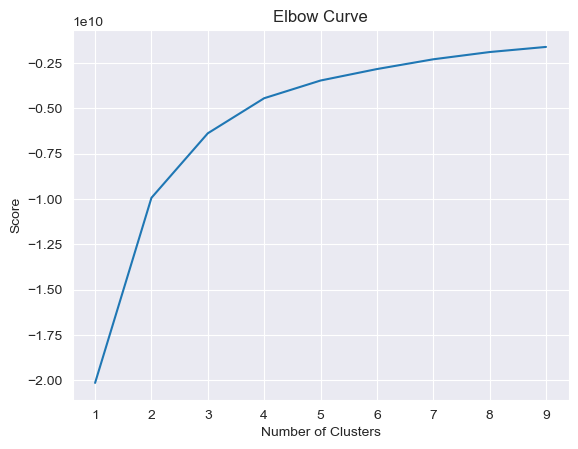

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

4. On the x-axis, the curve jumps from 2 to 3, slightly rises to 4 before flattening out. This suggests that the optimal count for my clusters in 4.

5. k-means clustering

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [32]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\honoc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

6. Attach a new column to your dataframe with the resulting 

In [33]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\honoc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
df.head()

,rate,votes,Cost2plates,clusters
0,4.1,775,800,1
1,4.1,787,800,1
2,3.8,918,800,1
3,3.7,88,300,0
4,3.8,166,600,0


In [40]:
df.to_csv(os.path.join(path, 'Prepared Data', 'zomato_clusters.csv'), index=False)

In [35]:
df['clusters'].value_counts()

clusters
0    12078
1     2414
3      972
2      111
Name: count, dtype: int64

7. Creating a few different visualizations

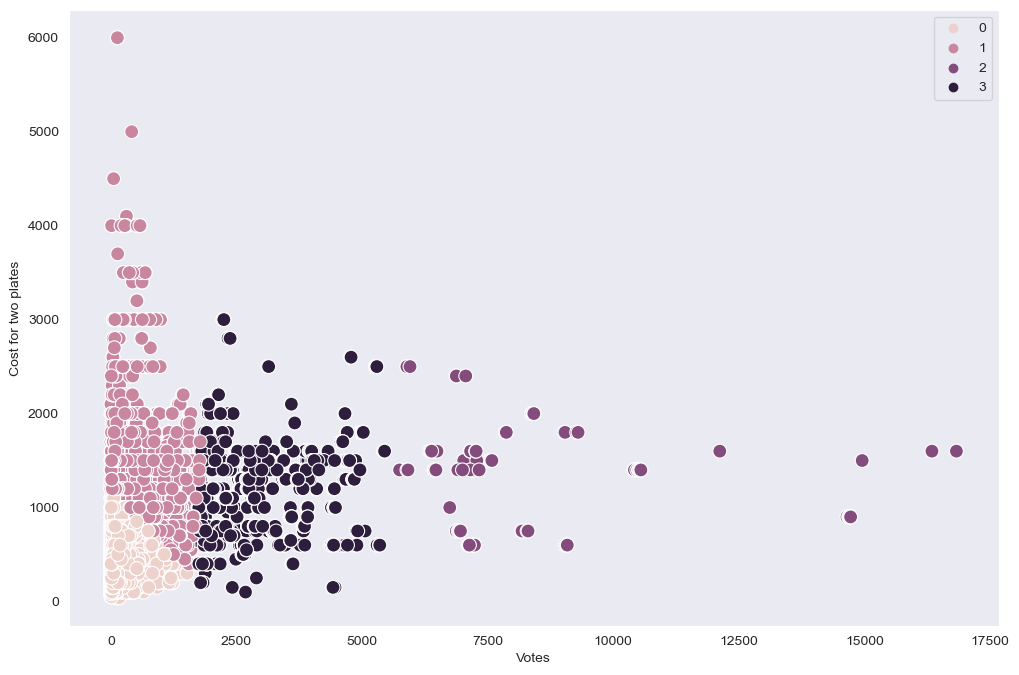

In [36]:
# Plot the clusters for the "votes" and "Cost2plates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['votes'], y=df['Cost2plates'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Votes') # Label x-axis.
plt.ylabel('Cost for two plates') # Label y-axis.
plt.show()

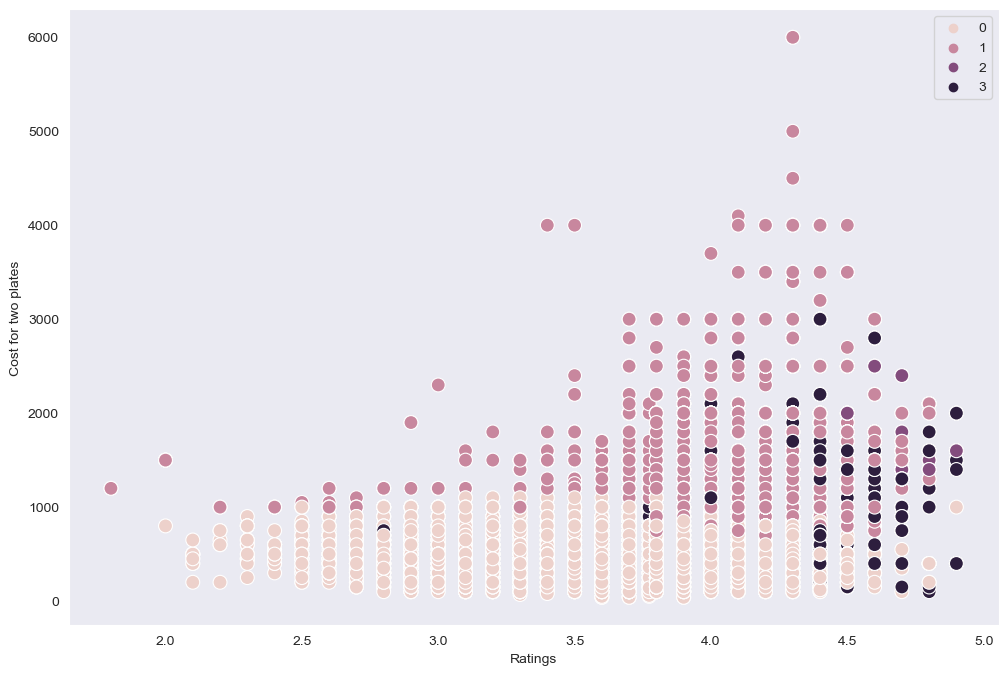

In [37]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rate'], y=df['Cost2plates'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Ratings')
plt.ylabel('Cost for two plates')
plt.show()

8. The clusters make sense based on the observed patterns in the scatter plots. Cluster 3 appears to represent higher-end restaurants with higher costs, ratings, and votes. Clusters 0,1,2 exhibit distinct characteristics in terms of costs, votes, and ratings, with cluster 0 pointing towards lower-end restaurants in terms of costs, and ratings, therefore providing meaningful segmentation. However, further exploration such as examining the influence of additional variables, such as restaurant type or location, on the identified clusters.

9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [38]:
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'dark pink'

In [39]:
df.groupby('cluster').agg({'rate':['mean', 'median'],
                           'votes':['mean', 'median'],
                           'Cost2plates':['mean', 'median']})

rate               votes          Cost2plates        
                 mean median         mean  median         mean  median
cluster                                                               
dark pink    3.655710    3.7   161.754926    82.5   461.177099   400.0
dark purple  4.536036    4.6  8411.189189  7284.0  1335.135135  1400.0
pink         4.111420    4.1   707.367440   675.0  1419.614747  1300.0
purple       4.326873    4.3  2791.260288  2449.5  1165.534979  1200.0

The descriptive analysis reveal distinct characteristics of each cluster category. Dark purple stands out with the highest average ratings (4.54) and substantial votes (mean of 8411), indicating a cluster of highly-rated and popular restaurants. Pink and dark pink clusters exhibit moderate ratings (around 4.33 & 3.66 respectively) with pink having a larger average number of votes, suggesting a mix of well-rated restaurants with varying popularity. Purple, on the other hand, has lower average ratings (4.11) and votes (705), potentially representing a cluster of more modestly rated and less frequented establishments.

10. The insights from these results offer actionable strategies for businesses, allowing them to tailor marketing efforts to specific clusters, such as emphasizing premium offerings for the dark purple segment and budget-friendly promotions for the oink and dark-pink clusters. Moreover, the identified clusters can serve as valuable features in predictive models, enhancing their ability to forecast restaurant success or customer preferences in subsequent stages of the analytics pipeline.